**Regression Model**

In [1]:
#Importing the useful libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import math

In [2]:
##  importing data
from google.colab import files # Importing the data 
uploaded = files.upload()

Saving august_senate_polls.csv to august_senate_polls.csv


In [3]:
import pandas as pd ## Read the data 
df2 = pd.read_csv('august_senate_polls.csv')

In [4]:
df2.head() ### displaying the head of the data.

,cycle,state,senate_class,start_date,end_date,DEM_poll,REP_poll,DEM_result,REP_result,error,absolute_error
0,2016,IA,3,2016-08-30,2016-08-31,43.0,49.0,35.66,60.09,-18.43,18.43
1,2016,PA,3,2016-08-30,2016-08-31,44.0,41.0,47.34,48.77,-4.43,4.43
2,2016,NH,3,2016-08-30,2016-08-31,47.0,44.0,47.98,47.84,-2.86,2.86
3,2016,CO,3,2016-08-29,2016-08-31,48.0,38.0,49.97,44.31,-4.34,4.34
4,2016,NY,3,2016-08-28,2016-08-30,60.0,23.0,70.60,27.17,6.43,6.43


In [5]:
df2.dtypes  ## finding data types for the data

cycle               int64
state              object
senate_class        int64
start_date         object
end_date           object
DEM_poll          float64
REP_poll          float64
DEM_result        float64
REP_result        float64
error             float64
absolute_error    float64
dtype: object

In [6]:

df2.isnull().any() ### checking the null values in the data

cycle             False
state             False
senate_class      False
start_date        False
end_date          False
DEM_poll          False
REP_poll          False
DEM_result        False
REP_result        False
error             False
absolute_error    False
dtype: bool

**droping unwanted columns**

In [7]:
data = df2.drop(['cycle',	'state',	'senate_class',	'start_date',	'end_date', 'error'	], axis=1)  ## droping the columns


In [8]:
data  ### usefull data 

## feature lables is [DEM_poll,	REP_poll,	DEM_result,	REP_result]
## target lable is [absolute_error].

,DEM_poll,REP_poll,DEM_result,REP_result,absolute_error
0,43.0,49.0,35.66,60.090,18.430
1,44.0,41.0,47.34,48.770,4.430
2,47.0,44.0,47.98,47.840,2.860
3,48.0,38.0,49.97,44.310,4.340
4,60.0,23.0,70.60,27.170,6.430
...,...,...,...,...,...
589,58.0,29.0,57.48,41.230,12.750
590,27.0,54.0,46.19,53.680,19.510
591,52.0,15.5,27.75,22.255,31.005
592,61.0,24.0,57.48,41.230,20.750


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


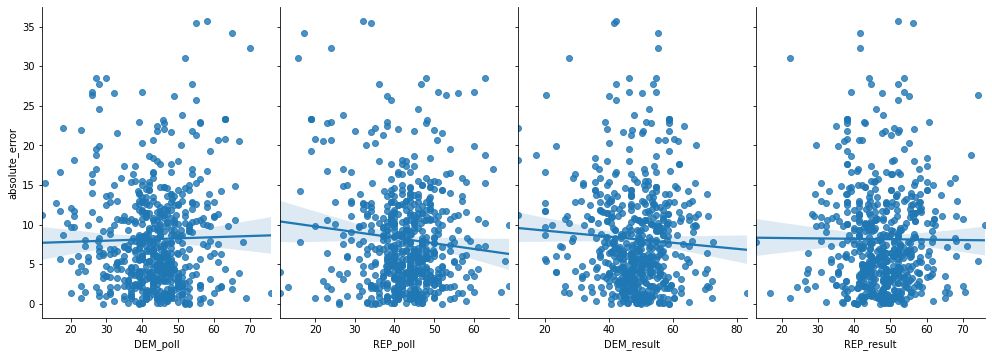

In [20]:
import seaborn as sns ## importing seaborn library 
%matplotlib inline 

##viewing the data
sns.pairplot(data, x_vars=['DEM_poll',	'REP_poll',	'DEM_result',	'REP_result'], y_vars ='absolute_error', size = 5,aspect=0.7,kind= 'reg' )

**Applying Regression Model**

In [12]:
## applying ridge model
from sklearn.ensemble import RandomForestRegressor


##setup random seed
np.random.seed(42)

### preparing the data
x = data.drop('absolute_error', axis= 1)
y = data['absolute_error']

## splitting in to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

##applying model
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

##checking the score
model.score(x_test, y_test)




0.7243138797988314

**Mean Absolute Error**

In [13]:
from sklearn.metrics import mean_absolute_error ## importing library 

y_preds = model.predict(x_test)   ## predected values
MAE = mean_absolute_error(y_test,y_preds)

MAE

2.4361806722689088

**Actual and predicted values**

In [19]:
df = pd.DataFrame(data={'actual values':  y_test,  ## creating data frame for actual and predicted values
                      'predicted values': y_preds,
                    } )
df

,actual values,predicted values
30,2.21,3.7411
299,3.07,3.6635
177,4.00,4.4706
204,19.97,9.7674
354,6.65,7.2174
...,...,...
580,17.66,15.9784
228,17.05,9.4865
84,8.86,7.2085
140,18.70,17.4748


**Mean Squared Error**

In [ ]:
from sklearn.metrics import mean_squared_error  ## importing library
y_preds = model.predict(x_test)  ## finding y predict values
MSE = mean_squared_error(y_test,y_preds)   

MSE


11.774100114747913

**Cross Vall Score and Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(n_estimators=100) applying the model.


cross_val_score = cross_val_score(model, x, y, cv = 5)  ## cross val score 
 
cross_val_score

array([0.64125204, 0.51268629, 0.56681201, 0.56135586, 0.48282906])

In [ ]:
print(f'The cross val accuracy is :{np.mean(cross_val_score)*100:.2f}%')

The cross val accuracy is :55.30%


**Regression model Evaluate**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error ## importing library
print(f'R^2: {r2_score(y_test,y_preds)}')    ## printing r2 score
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_preds)} ') #printing mae
print(f'Mean Squared_Error: {mean_squared_error(y_test,y_preds)}')  ## printing mse

R^2: 0.7243138797988314
Mean Absolute Error: 2.4361806722689088 
Mean Squared_Error: 11.774100114747913
